# 招聘信息分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

## 数据刷选、清洗&转换

In [2]:
# 导入数据源
df = pd.read_excel(u"数据分析_全国_11-15.xls")
# 刷选特征
df_new = df.loc[:,['createTime','formatCreateTime',
        'positionId','positionName','jobNature','companyShortName','city',
        'positionLables','salary','workYear','firstType','secondType','education',
        'companyId','companyFullName','companySize','financeStage','industryField'
         ]]
# 更新index
df_new=df_new.set_index(['createTime']).reset_index()

In [3]:
df_new.shape

(1646, 18)

In [4]:
df_new['city'] = df_new['city'].map(lambda s:s.replace(u"市",""))

工资特征

In [5]:
def tsalary(s):
    s = s.split("-")[0]
    s = s.replace('k','')
    s = s.replace('K','')
    s = s.replace(u'以上','')
    s = s.replace(u'以下','')
    return int(s)
df_new.loc[:,'salary_true']=df_new['salary'].map(tsalary)

发布时间特征

In [6]:
df_new.loc[:,'Year']=df_new['createTime'].map(lambda s : s.split("-")[0] )
df_new.loc[:,'Month']=df_new['createTime'].map(lambda s : s.split("-")[1] )

In [7]:
df_new.head()

,createTime,formatCreateTime,positionId,positionName,jobNature,companyShortName,city,positionLables,salary,workYear,...,secondType,education,companyId,companyFullName,companySize,financeStage,industryField,salary_true,Year,Month
0,2016-11-14 15:00:10,15:00发布,2574369,数据分析,全职,拼多多,上海,"['数据分析', '数据']",15k-30k,3-5年,...,数据开发,本科,107784,杭州微米网络科技有限公司,150-500人,成长型(B轮),"电子商务,移动互联网",15,2016,11
1,2016-11-10 10:27:08,2016-11-10,1581069,数据分析工程师-深圳,全职,智互联,深圳,"['数据分析', '数据']",12k-20k,3-5年,...,后端开发,本科,106483,智互联（深圳）科技有限公司,50-150人,成长型(不需要融资),电子商务,12,2016,11
2,2016-11-14 18:38:55,18:38发布,2576049,数据分析专员,全职,Putao,上海,"['数据', '数据分析']",13k-26k,不限,...,运营,不限,82229,上海葡萄纬度科技有限公司,500-2000人,初创型(未融资),移动互联网,13,2016,11
3,2016-11-14 23:10:37,23:10发布,2576426,数据分析,全职,乂学,上海,"['数据分析', '数据']",5k-8k,1-3年,...,数据分析,本科,64597,上海乂学教育科技有限公司,50-150人,成长型(A轮),"移动互联网,教育",5,2016,11
4,2016-11-15 09:26:39,09:26发布,2547759,数据分析工程师,全职,美团点评,上海,"['数据分析', '数据挖掘', '数据']",20k-25k,3-5年,...,数据开发,本科,50702,北京三快在线科技有限公司,2000人以上,成熟型(D轮及以上),"移动互联网,O2O",20,2016,11


In [8]:
df_new.to_excel("temp.xls")

## 异常值处理
工资的异常值需要从多个角度考虑，学历、经验等要求不同，分布也不同，不能单单只从总体考虑

以工作经验为筛选异常值，3倍标准差原理

C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


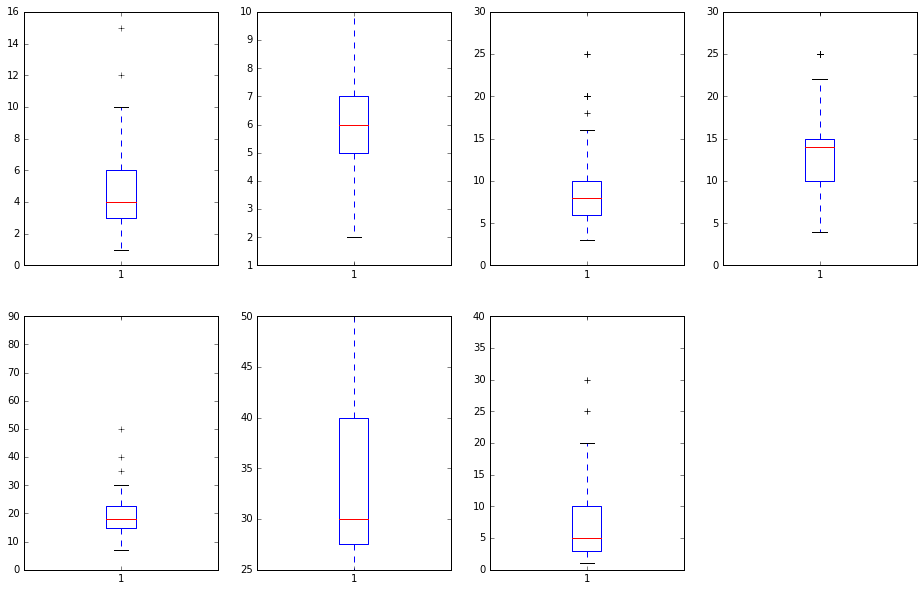

In [9]:
plt.figure(figsize=(16,10))
plt.subplot(2,4,1) # 子区间的序号从1开始
plt.boxplot(df_new[df_new['workYear']==u"应届毕业生"]['salary_true'].values)
plt.subplot(2,4,2)
plt.boxplot(df_new[df_new['workYear']==u"1年以下"]['salary_true'].values)
plt.subplot(2,4,3)
plt.boxplot(df_new[df_new['workYear']==u"1-3年"]['salary_true'].values)
plt.subplot(2,4,4)
plt.boxplot(df_new[df_new['workYear']==u"3-5年"]['salary_true'].values)
plt.subplot(2,4,5)
plt.boxplot(df_new[df_new['workYear']==u"5-10年"]['salary_true'].values)
plt.subplot(2,4,6)
plt.boxplot(df_new[df_new['workYear']==u"10年以上"]['salary_true'].values)
plt.subplot(2,4,7)
plt.boxplot(df_new[df_new['workYear']==u"不限"]['salary_true'].values)
plt.show()

In [10]:
df_new=df_new.drop(df_new.loc[df_new['workYear']==u'应届毕业生'][df_new['salary_true']>10].index)
df_new=df_new.drop(df_new.loc[df_new['workYear']==u'1-3年'][df_new['salary_true']>17].index)
df_new=df_new.drop(df_new.loc[df_new['workYear']==u'3-5年'][df_new['salary_true']>23].index)
df_new=df_new.drop(df_new.loc[df_new['workYear']==u'5-10年'][df_new['salary_true']>30].index)
df_new=df_new.drop(df_new.loc[df_new['workYear']==u'不限'][df_new['salary_true']>20].index)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [11]:
df_new.shape

(1601, 21)

## 数据探索
以工资（月薪/K）为主

In [12]:
# 静态描述
statistics = df_new['salary_true'].describe() #保存基本统计量

statistics.loc['range'] = statistics.loc['max']-statistics.loc['min'] #极差
statistics.loc['var'] = statistics.loc['std']/statistics.loc['mean'] #变异系数
statistics.loc['dis'] = statistics.loc['75%']-statistics.loc['25%'] #四分位数间距

print(statistics)

count    1601.000000
mean       10.236727
std         5.341189
min         1.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        50.000000
range      49.000000
var         0.521767
dis         9.000000
Name: salary_true, dtype: float64


(array([ 291.,  759.,  395.,  124.,   19.,   12.,    0.,    0.,    0.,    1.]),
 array([  1. ,   5.9,  10.8,  15.7,  20.6,  25.5,  30.4,  35.3,  40.2,
         45.1,  50. ]),
 <a list of 10 Patch objects>)

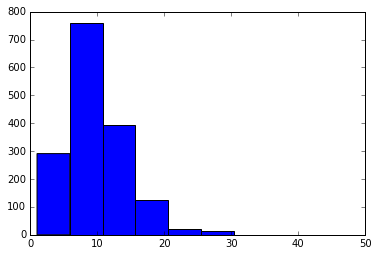

In [13]:
plt.hist(df_new['salary_true'],bins=10, histtype='bar')

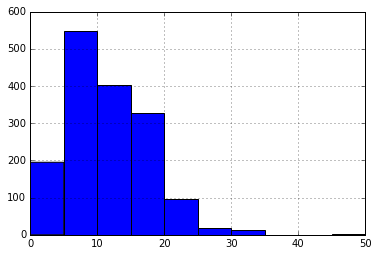

In [14]:
df_new['salary_true'].hist(bins=[0,5,10,15,20,25,30,35,40,45,50])

## 城市对招聘的影响（数量&工资）

In [15]:
city_job_num = pd.pivot_table(df_new,index=['city'],values=['salary_true'],aggfunc=len).sort_values(by="salary_true",ascending=False)

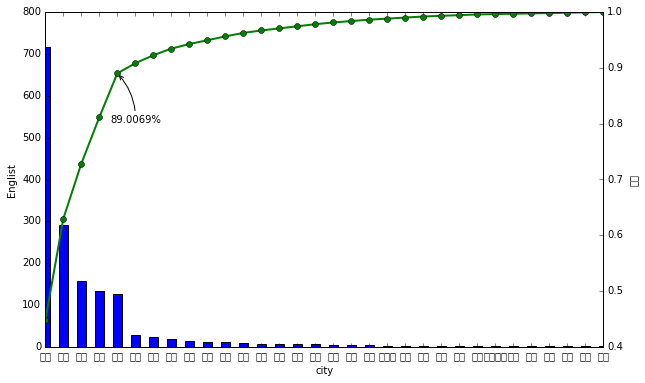

In [17]:
# 帕累托图
temp_series = city_job_num[u'salary_true'].copy()
temp_series.sort_values(ascending = False)

# 设置好图像大小
plt.figure(figsize=(10,6))
temp_series.plot(kind='bar')

plt.ylabel(u'Englist')
p = 1.0*temp_series.cumsum()/temp_series.sum()
p.plot(color = 'g', secondary_y = True, style = '-o',linewidth = 2)

# 添加注释，第五个点的标记。这里包括了指定箭头样式。
plt.annotate(format(p[4], '.4%'), xy = (4, p[4]), xytext=(4*0.9, p[4]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) 
plt.ylabel(u'中文')

plt.show()

筛选出招聘数量超过100的城市

In [18]:
g = df_new.groupby('city')
con1 = lambda s : len(s) > 100
g2 = g.filter(con1)
g2['city'].unique()

array(['上海', '深圳', '北京', '杭州', '广州'], dtype=object)

In [22]:
pd.pivot_table(g2,index=['city'],columns=['workYear'],values=['salary_true'],aggfunc=len).fillna(0)

salary_true                                      
workYear        1-3年 10年以上  1年以下   3-5年 5-10年     不限 应届毕业生
city                                                      
上海             108.0   0.0   4.0   99.0  28.0   42.0  11.0
北京             259.0   2.0  14.0  253.0  65.0  101.0  22.0
广州              54.0   0.0   0.0   36.0   9.0   23.0   4.0
杭州              62.0   0.0   0.0   52.0   6.0   10.0   3.0
深圳              61.0   1.0   0.0   55.0   9.0   25.0   7.0

In [23]:
pd.pivot_table(g2,index=['city'],values=['salary_true'],aggfunc=np.mean).sort_values(by="salary_true",ascending=False)

,salary_true
city,
北京,11.470670
上海,10.722603
深圳,10.487342
杭州,9.834586
广州,7.492063


## 经验的影响

In [24]:
pd.pivot_table(df_new,index=['workYear'],values=['salary_true'],aggfunc=len).sort_values(by="salary_true",ascending=False)

,salary_true
workYear,
1-3年,621
3-5年,542
不限,236
5-10年,123
应届毕业生,55
1年以下,21
10年以上,3


In [25]:
temp = pd.pivot_table(df_new,index=['workYear'],values=['salary_true'],aggfunc=np.mean)

In [26]:
temp2 = pd.pivot_table(df_new,index=['workYear'],values=['salary_true'],aggfunc=len)

In [27]:
temp2.columns=['num']

In [28]:
pd.concat([temp,temp2],axis=1).sort_values(by=['salary_true'],ascending=True)

,salary_true,num
workYear,,
应届毕业生,4.436364,55
1年以下,5.666667,21
不限,6.500000,236
1-3年,8.486312,621
3-5年,12.680812,542
5-10年,18.243902,123
10年以上,35.000000,3


## 学历的要求

问题出现了：本科与硕士的工资差

In [29]:
pd.pivot_table(df_new,index=['education'],values=['salary_true'],aggfunc=[len,np.mean])

,len,mean
,salary_true,salary_true
education,,
不限,88,8.556818
博士,3,12.666667
大专,188,7.824468
本科,1222,10.697218
硕士,100,10.550000


In [37]:
ttt=df_new[df_new['education']==u"本科"]

In [38]:
pd.pivot_table(ttt,index=['workYear'],values=['salary_true'],aggfunc=[len,np.mean])

,len,mean
,salary_true,salary_true
workYear,,
1-3年,456,8.745614
10年以上,3,35.000000
1年以下,12,5.333333
3-5年,457,12.894967
5-10年,105,18.123810
不限,148,6.364865
应届毕业生,41,4.317073


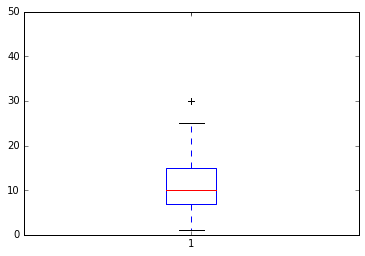

In [30]:
plt.boxplot(df_new[df_new['education']==u"本科"]['salary_true'].values)
plt.show()

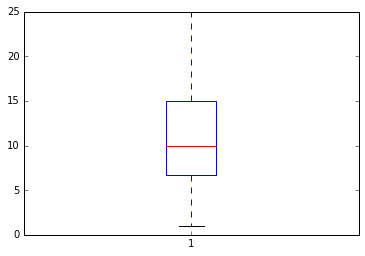

In [31]:
plt.boxplot(df_new[df_new['education']==u"硕士"]['salary_true'].values)
plt.show()

### 公司类型

In [35]:
pd.pivot_table(g2,index=['financeStage'],columns=['jobNature'],values=['salary_true'],aggfunc=[len,np.mean]).fillna(0)

len                   mean               
             salary_true            salary_true               
jobNature             全职   兼职    实习          全职   兼职        实习
financeStage                                                  
上市公司               321.0  0.0  16.0   11.426791  0.0  2.312500
初创型(不需要融资)          30.0  2.0   1.0    7.800000  2.5  2.000000
初创型(天使轮)            75.0  0.0   6.0   10.586667  0.0  2.833333
初创型(未融资)            99.0  4.0   9.0    8.828283  4.5  2.666667
成熟型(C轮)            126.0  0.0   8.0   11.285714  0.0  3.000000
成熟型(D轮及以上)         151.0  0.0  15.0   13.251656  0.0  3.266667
成熟型(不需要融资)         110.0  0.0   3.0   10.600000  0.0  1.666667
成长型(A轮)            151.0  0.0   6.0   11.039735  0.0  2.666667
成长型(B轮)            165.0  0.0   8.0   11.721212  0.0  3.125000
成长型(不需要融资)         114.0  0.0   5.0   11.061404  0.0  2.000000

In [33]:
pd.pivot_table(g2,index=['companySize'],values=['salary_true'],aggfunc=[len,np.mean])

,len,mean
,salary_true,salary_true
companySize,,
15-50人,129,8.868217
150-500人,309,9.987055
2000人以上,482,11.520747
50-150人,191,10.340314
500-2000人,299,11.240803
少于15人,15,8.933333


In [34]:
pd.pivot_table(g2,index=['jobNature'],values=['salary_true'],aggfunc=[len,np.mean])

,len,mean
,salary_true,salary_true
jobNature,,
全职,1342,11.192996
兼职,6,3.833333
实习,77,2.714286
